# DCS 640 Data Presentation & Visualization (DSC640-T302 2231-1)
## Bellevue University
## 1.2 Exercises: Charts
## Author: Jake Meyer
## Date: 12/06/2022

## Assignment Instructions:

Submit 1 bar chart, 1 stacked bar chart, 1 pie chart, and 1 donut chart with Python

In [1]:
'''
Import the necessary libraries to complete Exercise 1.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3


## Dataset Understanding

In [3]:
'''
Import the datasets.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_excel() to read the file as a pandas data frame.
'''
df1 = pd.read_excel('hotdog-contest-winners.xlsm')
df2 = pd.read_excel('hotdog-places.xlsm')
df3 = pd.read_excel('obama-approval-ratings.xls')

In [4]:
'''
Use head() function to display the first 5 rows of data of df1.
'''
df1.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [5]:
'''
Use head() function to display the first 5 rows of data of df2.
'''
df2.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [6]:
'''
Use head() function to display the first 5 rows of data of df3.
'''
df3.head()

,Issue,Approve,Disapprove,None
0,Race Relations,52,38,10
1,Education,49,40,11
2,Terrorism,48,45,7
3,Energy Policy,47,42,11
4,Foreign Affairs,44,48,8


In [7]:
'''
Understand the shape of the df1.
'''
print('There are {} rows and {} columns in the df1.'.format(df1.shape[0], df1.shape[1]))

There are 31 rows and 5 columns in the df1.


In [8]:
'''
Understand the shape of the df2.
'''
print('There are {} rows and {} columns in the df2.'.format(df2.shape[0], df2.shape[1]))

There are 3 rows and 11 columns in the df2.


In [9]:
'''
Understand the shape of the df3.
'''
print('There are {} rows and {} columns in the df3.'.format(df3.shape[0], df3.shape[1]))

There are 13 rows and 4 columns in the df3.


In [10]:
'''
Convert Year to Date Time for df1.
'''
df1['Year'] = pd.to_datetime(df1['Year'])

In [11]:
'''
Find the type of data within each df1 column initially.
'''
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        31 non-null     datetime64[ns]
 1   Winner      31 non-null     object        
 2   Dogs eaten  31 non-null     float64       
 3   Country     31 non-null     object        
 4   New record  31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [12]:
'''
Find the type of data within each df2 column initially.
'''
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      int64  
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      int64  
 6   2006    3 non-null      int64  
 7   2007    3 non-null      int64  
 8   2008    3 non-null      int64  
 9   2009    3 non-null      float64
 10  2010    3 non-null      int64  
dtypes: float64(5), int64(6)
memory usage: 392.0 bytes


In [13]:
'''
Find the type of data within each df3 column initially.
'''
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Issue       13 non-null     object
 1   Approve     13 non-null     int64 
 2   Disapprove  13 non-null     int64 
 3   None        13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [14]:
'''
Understand if there are any missing values in df1.
'''
df1.isna().sum().sort_values(ascending = False)

Year          0
Winner        0
Dogs eaten    0
Country       0
New record    0
dtype: int64

In [15]:
'''
Understand if there are any missing values in df2.
'''
df2.isna().sum().sort_values(ascending = False)

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64

In [16]:
'''
Understand if there are any missing values in df3.
'''
df3.isna().sum().sort_values(ascending = False)

Issue         0
Approve       0
Disapprove    0
None          0
dtype: int64

In [17]:
'''
Group the data by country for number of hot dogs eaten.
'''
data = df1.groupby('Country')['Dogs eaten'].sum()
chart_df = pd.DataFrame(data, columns = ['Dogs eaten'])
chart_df.head()

,Dogs eaten
Country,
Germany,9.50
Japan,369.88
Mexico,19.50
United States,499.85


## Chart Creation from the Datasets. 

### Bar Chart

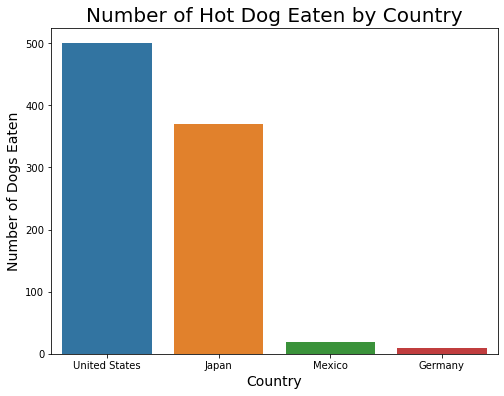

In [18]:
'''
Create a bar chart using one of the datasets from the previous section.
Use Seaborn to construct the barplot with barplot()
'''
fig = plt.figure(figsize = (8,6))
sns.barplot(x = chart_df.index, y = 'Dogs eaten', data = chart_df, 
            order = chart_df.sort_values('Dogs eaten', ascending = False).index)
plt.title('Number of Hot Dog Eaten by Country', fontsize = 20)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Number of Dogs Eaten', fontsize = 14)
plt.show()

### Stacked Bar Chart

<Figure size 864x432 with 0 Axes>

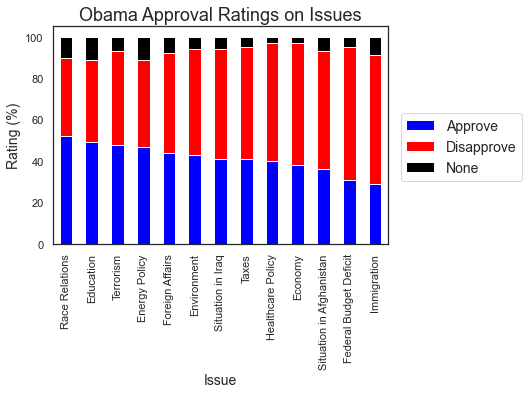

In [27]:
'''
Create a stacked bar chart using one of the datsets from the previous section.
Use Seaborn to construcked the stacked barplot.
'''
# Seaborn plotting aesthetics set to white.
sns.set(style = 'white')

# Create the stacked bar chart
fig = plt.figure(figsize = (12,6))
df3.set_index('Issue').plot(kind = 'bar', stacked = True, color = ['blue', 'red', 'black'])

# Add axis and chart titles.
plt.title('Obama Approval Ratings on Issues', fontsize = 18)
plt.xlabel('Issue', fontsize = 14)
plt.ylabel('Rating (%)', fontsize = 14)
plt.legend(bbox_to_anchor=(1.4,.6), loc = 'upper right', borderaxespad = 0, fontsize = 14)
plt.show()

### Pie Chart

In [20]:
'''
Group the data by country for number of hot dogs eaten.
'''
data = df1.groupby('Country')['Dogs eaten'].sum()
pie_df = pd.DataFrame(data, columns = ['Dogs eaten'])
pie_df.head()

,Dogs eaten
Country,
Germany,9.50
Japan,369.88
Mexico,19.50
United States,499.85


Text(0.5, 1.0, 'Percentage of Hot Dogs Eaten by Country')

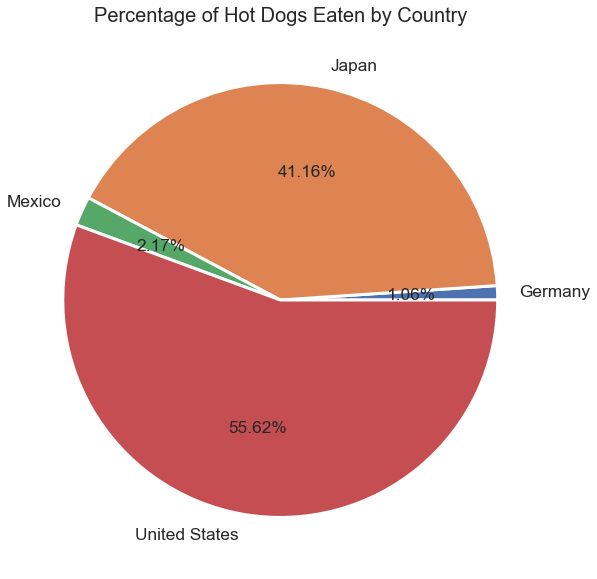

In [21]:
'''
Create a pie chart using one of the datsets from the previous section.
Matplotlib will be used to create the plot.
'''
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(pie_df['Dogs eaten'], labels = pie_df.index, autopct='%1.2f%%', wedgeprops = {'linewidth':3.0, 'edgecolor': 'white'},
      textprops = {'size': 'x-large'})
plt.title("Percentage of Hot Dogs Eaten by Country", fontsize = 20)

### Donut Chart

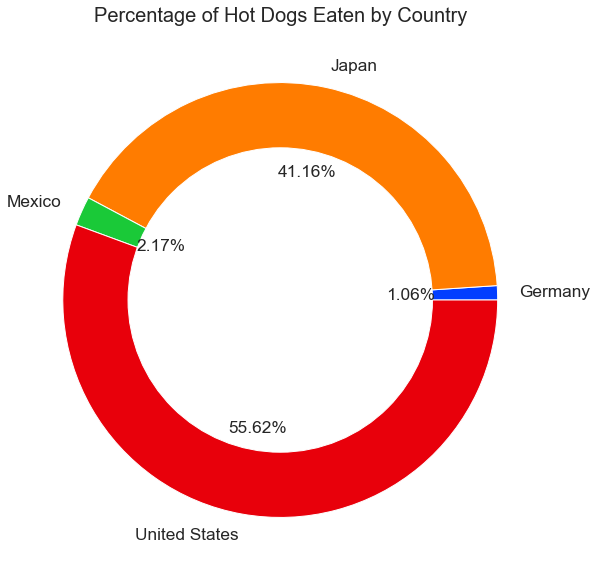

In [24]:
'''
Create a donut chart using one of the datsets from the previous section.
Seaborn and Matplotlib will be used to create the plot.
'''
fig = plt.figure(figsize = (12,10))
pallet_color = sns.color_palette('bright')
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(pie_df['Dogs eaten'], labels = pie_df.index, colors = pallet_color, autopct = '%.2f%%', textprops = {'size': 'x-large'})
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of Hot Dogs Eaten by Country', fontsize = 20)
plt.show()